In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Avg_TrustMatrix = pd.read_csv('Average_Trust_Matrix.csv',index_col = 0)
Avg_TrustMatrix.index.name = 'userIdRow'
Avg_TrustMatrix.columns.name = 'userIdCol'
Avg_TrustMatrix.head()

userIdCol,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
userIdRow,,,,,,,,,,,,,,,,,,,,,
254,1.000000,0.700428,0.635092,0.496444,0.989191,0.630367,0.227055,0.000000,0.607312,0.588055,...,0.694549,0.416049,0.615555,0.619732,0.590498,0.663900,0.560183,0.000000,0.999748,0.863708
2276,0.700428,1.000000,0.734654,0.996621,0.327729,0.350358,0.000000,0.990621,0.000000,0.669854,...,0.486710,0.507073,0.369577,0.522451,0.000000,0.554714,0.989484,0.629868,0.543979,0.716093
2766,0.635092,0.734654,1.000000,0.684458,0.676017,0.000000,0.617969,0.000000,0.414526,0.542528,...,0.555115,0.709742,0.344514,0.632475,0.825707,0.774567,0.458739,0.435376,0.021392,0.631422
2977,0.496444,0.996621,0.684458,1.000000,0.782198,0.380467,0.385829,0.000000,0.619874,0.777815,...,0.604902,0.382728,0.410441,0.993820,0.555309,0.509903,0.824503,0.982124,0.000000,0.968871
3363,0.989191,0.327729,0.676017,0.782198,1.000000,0.000000,0.456861,0.000000,0.802870,0.826472,...,0.715069,0.566471,0.585130,0.861134,0.988661,0.861884,0.689607,0.999820,0.606309,0.886542


In [3]:
Lathia_TrustMatrix = pd.read_csv('Lathia_Et_al_TrusMatrix.csv',index_col = 0)
Lathia_TrustMatrix.index.name = 'userIdRow'
Lathia_TrustMatrix.columns.name = 'userIdCol'

Donvon_TrustMatrix = pd.read_csv('Donvon_Smyth_TrustMatrix.csv',index_col = 0)
Donvon_TrustMatrix.index.name = 'userIdRow'
Donvon_TrustMatrix.columns.name = 'userIdCol'

Shambour_TrustMatrix = pd.read_csv('Shambour_Lu_TrustMatrix.csv',index_col = 0)
Shambour_TrustMatrix.index.name = 'userIdRow'
Shambour_TrustMatrix.columns.name = 'userIdCol'

In [4]:
UserBookRating = pd.read_csv('UserBookRating.csv',index_col=0)
UserBookRating.columns.name = 'BookTitle'
UserBookRating.head()

BookTitle,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Cry In The Night,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
userID,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [5]:
n,m = UserBookRating.shape
print(n,m)

894 746


In [6]:
#implementing knn (not required)
from sklearn.neighbors import NearestNeighbors
def KNN_Algorithm(TrustMatrix,TargetUser,K):
    model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
    model_knn.fit(TrustMatrix)
    distances, indices = model_knn.kneighbors(TrustMatrix.iloc[TargetUser,:].values.reshape(1,-1), n_neighbors=(K+1))
    similaruser = []
    for i in range(0, len(distances.flatten())):
        if i==0:
            print('Target user is {0}:\n'.format(TrustMatrix.index[TargetUser]))
        else:
            similaruser.append(TrustMatrix.index[indices.flatten()[i]])
    print('Similar user list after KNN: ',similaruser)
    return similaruser

In [7]:
query_index = 722
#query_index = np.random.choice(TrustMatrix.shape[1])
AvgSimilar = KNN_Algorithm(Avg_TrustMatrix,query_index,10)
LathiaSimilar = KNN_Algorithm(Lathia_TrustMatrix,query_index,10)
DonvonSimilar = KNN_Algorithm(Donvon_TrustMatrix,query_index,10)
ShambourSimilar = KNN_Algorithm(Shambour_TrustMatrix,query_index,10)

Target user is 229313:

Similar user list after KNN:  [135149, 16795, 227447, 35859, 228998, 238120, 76352, 87746, 148744, 52584]
Target user is 229313:

Similar user list after KNN:  [227447, 135149, 35859, 225763, 87746, 238120, 52584, 76352, 60244, 148744]
Target user is 229313:

Similar user list after KNN:  [16795, 162639, 135149, 13552, 165308, 122793, 56959, 153662, 129716, 35859]
Target user is 229313:

Similar user list after KNN:  [98741, 227447, 87746, 238781, 234623, 238120, 135149, 115490, 76352, 268330]


In [8]:
def RecommendBook(TrustMatrix,similaruser):
    SimilarUserTable = (UserBookRating.loc[similaruser]).transpose()
    SimilarUserTable['Average'] = pd.DataFrame(SimilarUserTable.mean(axis = 1))
    SortedTable = SimilarUserTable.sort_values(by = 'Average',ascending=False)
    print('Top 10 recommendation : ')
    print(SortedTable['Average'].head(10))
    target = TrustMatrix.index[query_index]
    TargetUserRating = UserBookRating.loc[target]
    AvgRating = SimilarUserTable['Average']
    #Efficiency Calculation
    count = 0
    for i in range (m):
        val1 = float(AvgRating[i])
        val2 = float(TargetUserRating[i])
        if val1 != val1 or val2 != val2 or val1==val2:
            count += 1
    eff = (count/m)*100
    print('Total = ',m,'Same rating = ',count)
    print('Efficiency = ',eff,' Percent')
    print(' ')
    return eff

In [9]:
Efflist = []
Efflist.append(RecommendBook(Lathia_TrustMatrix,LathiaSimilar))
Efflist.append(RecommendBook(Donvon_TrustMatrix,DonvonSimilar))
Efflist.append(RecommendBook(Shambour_TrustMatrix,ShambourSimilar))
Efflist.append(RecommendBook(Avg_TrustMatrix,AvgSimilar))
print(Efflist)

Top 10 recommendation : 
BookTitle
The Fellowship of the Ring (The Lord of the Rings, Part 1)                10.0
The Hitchhiker's Guide to the Galaxy                                       9.0
Nicolae: The Rise of Antichrist (Left Behind No. 3)                        9.0
G Is for Gumshoe (Kinsey Millhone Mysteries (Paperback))                   9.0
The Lost Boy: A Foster Child's Search for the Love of a Family             8.0
Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death     8.0
The Other Boleyn Girl                                                      8.0
Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)          7.5
Girl, Interrupted                                                          7.0
Fahrenheit 451                                                             7.0
Name: Average, dtype: float64
Total =  746 Same rating =  700
Efficiency =  93.8337801608579  Percent
 
Top 10 recommendation : 
BookTitle
Rebecca                             

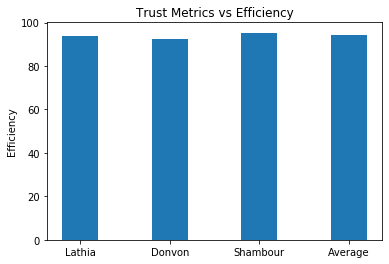

In [10]:
hight = Efflist
barsname = ('Lathia','Donvon','Shambour','Average')
yPos = [0,2,4,6]
plt.bar(yPos,hight)
plt.xticks(yPos,barsname)
plt.ylabel('Efficiency')
plt.title('Trust Metrics vs Efficiency')
plt.show()